In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import json 

#plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# import stratified k fold
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier


from xgboost import XGBClassifier
import re


import statistics


from sklearn.model_selection import GridSearchCV

# import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold



from sklearn.metrics import make_scorer


import time


warnings.filterwarnings('ignore')

# Helper Functions

In [25]:
#plot roc curve
from sklearn.metrics import roc_curve, auc
#plot roc curve
def plot_roc_curve(y_test, y_pred,label):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: '+label)
    plt.legend(loc="lower right")
    plt.show()


In [26]:
# plot confusion matrix function
def plot_confusion_matrix(y_test, y_pred, label):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title('Confusion Matrix: '+label)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [27]:
# function for metrics
def metrics(X,y,y_test, y_pred, modell = None, crossval = True, parameters = None):


    print("----- Metric for 80/20 Split -----")
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    print("Recall score:", recall_score(y_test, y_pred))
    print("Precision score:", precision_score(y_test, y_pred))
    print("fbeta score:", fbeta_score(y_test, y_pred, beta=2))
    print("----- Metric for Cross Validation -----")

    if crossval == True:
        modell.fit(X,y)
        
        print("Crossval score whole Dataset:", statistics.mean(cross_val_score(modell ,X, y, scoring=f2,cv = cv )))
        # print all the scores
        print("Crossval score whole Dataset Detail:", cross_val_score(modell ,X, y, scoring=f2,cv = cv ))

        print("Crossval score Train/Test:", statistics.mean(cross_val_score(modell ,X_train, y_train, scoring=f2,cv = cv )))
        # take mean of crossvalidation scores
        print("Crossval score Train/Test Detail:", cross_val_score(modell ,X_train, y_train, scoring=f2,cv = cv ))
        
    
       
        

In [28]:
# append metrics to dictionary
def metrics_dict_non_opt(y_test, y_pred, label, modell):
    Non_opt_results["Algo_name"].append(label)
    Non_opt_results["Recall"].append(recall_score(y_test, y_pred))
    Non_opt_results["Precision"].append(precision_score(y_test, y_pred))
    Non_opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    Non_opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))
    Non_opt_results["F2-CV-Whole"].append(statistics.mean(cross_val_score(modell ,X, y, scoring=f2,cv = cv )))
    Non_opt_results["F2-CV-Split"].append(statistics.mean(cross_val_score(modell ,X_train, y_train, scoring=f2,cv = cv )))


def metrics_dict_opt(y_test, y_pred, label, modell = None):
    Opt_results["Algo_name"].append(label)
    Opt_results["Recall"].append(recall_score(y_test, y_pred))
    Opt_results["Precision"].append(precision_score(y_test, y_pred))
    Opt_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    Opt_results["F2"].append(fbeta_score(y_test, y_pred,beta=2))
    Opt_results["F2-CV-Whole"].append(statistics.mean(cross_val_score(modell ,X, y, scoring=f2,cv = cv )))
    Opt_results["F2-CV-Split"].append(statistics.mean(cross_val_score(modell ,X_train, y_train, scoring=f2,cv = cv )))


In [29]:
# define function for crossvalidation and grid search measurement
def f2_measure(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)
f2 = make_scorer(f2_measure)

In [30]:

# load german_data_cleaned.csv
german_data = pd.read_csv('german_data_cleaned.csv')

In [31]:
german_data

,Installmentrate %,PresentResidence,Age in years,Number existing Credits,Number people liable,Target,Credit Amount per Month,Status Checking_0 less than or equal and less than 200 DM,Status Checking_bigger than 200DM / salary assignments for at least 1 year,Status Checking_less than 0 DM,...,Housing_own,Job_management/self-employed/highly qualified employee/officer,Job_skilled employee /official,Job_unemployed/unskilled-non-resident,Job_unskilled-resident,Telephone_None,Foreign Worker_no,Sex_female,Status_ divorced/separated,Status_ married/windowed
0,4,4,67,2,1,0,194.833333,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,2,2,22,1,1,1,123.979167,1,0,0,...,1,0,1,0,0,1,0,1,0,0
2,2,3,49,1,2,0,174.666667,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,2,4,45,1,2,0,187.666667,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,3,4,53,2,2,1,202.916667,0,0,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,4,31,1,1,0,144.666667,0,0,0,...,1,0,0,0,1,1,0,1,0,0
996,4,4,40,1,1,0,128.566667,0,0,1,...,1,1,0,0,0,0,0,0,1,0
997,4,4,38,1,1,0,67.000000,0,0,0,...,1,0,1,0,0,1,0,0,0,0
998,4,4,23,1,1,1,41.000000,0,0,1,...,0,0,1,0,0,0,0,0,0,0


# Split Feauture und Target

In [32]:
# split features and target
X = german_data.drop(['Target'], axis=1)
y = german_data['Target']

In [33]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X = SelectKBest(chi2, k=10).fit_transform(X, y)

In [34]:
#X

In [35]:

# Kreuzvalidierung
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

In [36]:
# create dictionary with algo names and score metrics for later analysis

Non_opt_results = {"Algo_name": [], "Recall": [],"Precision": [],"Accuracy": [], "F2": [], "F2-CV-Whole": [], "F2-CV-Split": []}

In [37]:
# split data into train and test set 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train

,Installmentrate %,PresentResidence,Age in years,Number existing Credits,Number people liable,Credit Amount per Month,Status Checking_0 less than or equal and less than 200 DM,Status Checking_bigger than 200DM / salary assignments for at least 1 year,Status Checking_less than 0 DM,Status Checking_no checking account,...,Housing_own,Job_management/self-employed/highly qualified employee/officer,Job_skilled employee /official,Job_unemployed/unskilled-non-resident,Job_unskilled-resident,Telephone_None,Foreign Worker_no,Sex_female,Status_ divorced/separated,Status_ married/windowed
29,3,4,63,2,1,113.933333,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
535,2,1,33,1,1,110.428571,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
695,2,4,50,1,1,206.000000,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
557,1,4,29,2,1,238.238095,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
836,4,2,21,1,1,73.833333,0,0,0,1,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2,4,39,2,2,358.777778,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
270,4,3,32,1,1,147.888889,0,0,0,1,...,1,0,1,0,0,1,1,0,0,0
860,4,2,27,2,1,241.833333,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
435,2,1,25,1,1,123.666667,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1


# Modelling Non-Optimized

## Logistic Regression

In [39]:
# use logistic regression to predict target variable
# create logistic regression model with standard parameters

def logistic_regression(X_train, X_test, y_train, y_test, hyperopt = False, parameters=dict(), opt = False):
    logreg = LogisticRegression(random_state=42, **parameters)
    
   
    if hyperopt == False:
        # fit the model
        logreg.fit(X_train, y_train)

        # predict the target variable
        y_pred = logreg.predict(X_test)
        
        # print accuracy score and recall score
        metrics(X,y,y_test, y_pred, crossval=True, modell=logreg)

        print(X_train.shape ,y_train.shape)

        # add algo name and recall score to dictionary
        if opt==False:
            metrics_dict_non_opt(y_test, y_pred, "Logistic Regression", logreg)
        elif opt == True:
            metrics_dict_opt(y_test, y_pred, "Logistic Regression", logreg)

        
        plot_roc_curve(y_test, y_pred,"Logistic Regression")
        plot_confusion_matrix(y_test,y_pred,"Logistic Regression")
    else:

        return logreg

    return logreg


----- Metric for 80/20 Split -----
Accuracy score: 0.735
Recall score: 0.4915254237288136
Precision score: 0.5576923076923077
fbeta score: 0.5034722222222222
----- Metric for Cross Validation -----
Crossval score whole Dataset: 0.453008927512486
Crossval score whole Dataset Detail: [0.49822064 0.46099291 0.47202797 0.36363636 0.40677966 0.42553191
 0.44169611 0.42402827 0.49295775 0.54421769]
Crossval score Train/Test: 0.43605079833740157
Crossval score Train/Test Detail: [0.48117155 0.45454545 0.44843049 0.34883721 0.55084746 0.44052863
 0.51948052 0.44444444 0.42222222 0.25      ]
(800, 53) (800,)


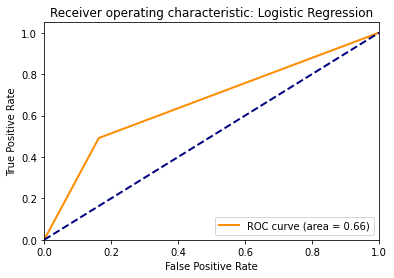

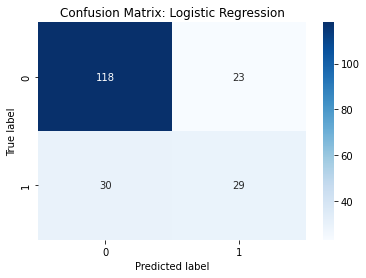

LogisticRegression(random_state=42)

In [40]:
logistic_regression(X_train, X_test, y_train, y_test)

In [41]:
log = LogisticRegression()
RandomForestClassifier(random_state=42)

RandomForestClassifier(random_state=42)

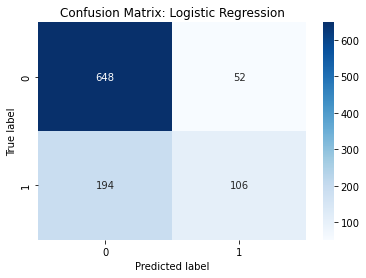

In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(RandomForestClassifier(random_state=42), X, y, cv= 5)
conf_mat = confusion_matrix(y, y_pred)
#plot confusion matrix
plt.figure()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



## Random Forest

In [43]:
def random_forest(X_train, X_test, y_train, y_test, hyperopt = False, parameters=dict(),opt = False):
    rf = RandomForestClassifier(random_state=42,**parameters)

    if hyperopt == False:
        rf.fit(X_train, y_train)
        # predict the target variable
        y_pred = rf.predict(X_test)
        # print accuracy score and recall score
        metrics(X,y,y_test, y_pred, crossval=True, modell=rf)

        if opt==False:
            metrics_dict_non_opt(y_test, y_pred, "Random forest", rf)
        elif opt == True:
            metrics_dict_opt(y_test, y_pred, "Random forest", rf)


        # show feature importance for random forest

        importances = rf.feature_importances_
        # plot importances
        plt.figure(figsize=(10,10))
        # order importances
        indices = np.argsort(importances)[::-1]
        sns.barplot(x=importances[indices], y=X_train.columns, orient='h')
        plt.xlabel('Feature Importance')
        plt.ylabel('Features')
        plt.title('Feature Importance')
        plt.show()

        plot_roc_curve(y_test, y_pred,"Random Forest")
        plot_confusion_matrix(y_test,y_pred,"Random Forest")
    else:
        return rf
    return rf

----- Metric for 80/20 Split -----
Accuracy score: 0.78
Recall score: 0.423728813559322
Precision score: 0.7142857142857143
fbeta score: 0.46125461254612543
----- Metric for Cross Validation -----
Crossval score whole Dataset: 0.4223452245385325
Crossval score whole Dataset Detail: [0.36764706 0.45289855 0.47101449 0.35055351 0.39426523 0.51236749
 0.3219697  0.47038328 0.47794118 0.40441176]
Crossval score Train/Test: 0.38835023001773367
Crossval score Train/Test Detail: [0.35714286 0.40909091 0.3652968  0.35377358 0.45045045 0.38288288
 0.46296296 0.39170507 0.38461538 0.3255814 ]


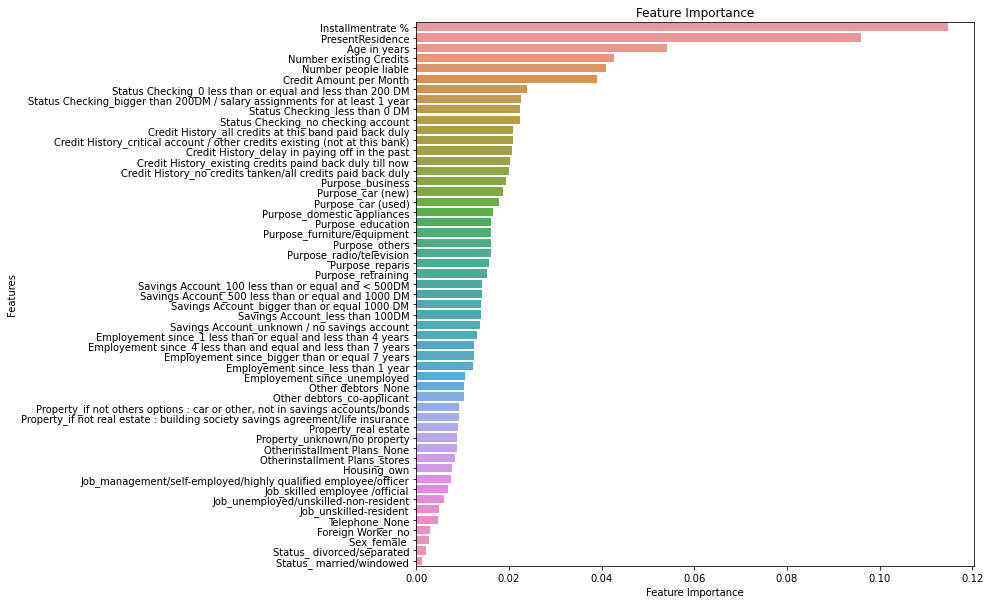

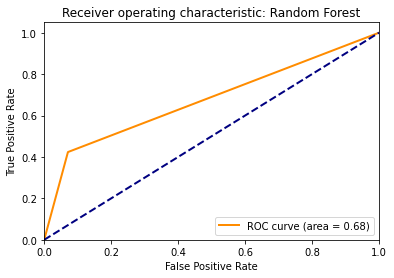

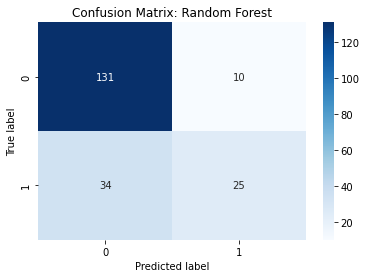

RandomForestClassifier(random_state=42)

In [44]:
random_forest(X_train, X_test, y_train, y_test)

## Neuronal Network

Normalerweise würde man die Daten für das Training mit einem Neuronalen Netz mithilfe eines scaler nomalisieren bzw. skalieren.
Dies wurde auch mithilfe des minmax scalers und dem standardscaler versucht. Allerdings hatten beide einen negativen Einfluss auf die Ergebnisse des Modells

In [45]:
# use neuro network to predict target variable
# als baseline werden die Standardparameter verwendet
# normalisieren
# fit the model

# import standard scaler from sklearn
from sklearn.preprocessing import StandardScaler


def neuronal_network(X_train, X_test, y_train, y_test, hyperopt = False, parameters=dict(),opt = False):
    
    if hyperopt == False:
        nn = MLPClassifier(random_state=42, **parameters)
        nn.fit(X_train, y_train)
        # predict the target variable
        y_pred = nn.predict(X_test)
        # print accuracy score and recall score
        metrics(X,y,y_test, y_pred, crossval=True, modell=nn)

        if opt==False:
            metrics_dict_non_opt(y_test, y_pred, "Neural Network", nn)
        elif opt == True:
            metrics_dict_opt(y_test, y_pred, "Neural Network", nn)
        plot_roc_curve(y_test, y_pred,"Neural Network")
        plot_confusion_matrix(y_test,y_pred,"Neural Network")
    else:
        return nn
    return nn

----- Metric for 80/20 Split -----
Accuracy score: 0.76
Recall score: 0.6949152542372882
Precision score: 0.5774647887323944
fbeta score: 0.6677524429967427
----- Metric for Cross Validation -----
Crossval score whole Dataset: 0.4893626230239092
Crossval score whole Dataset Detail: [0.5        0.69131833 0.40145985 0.22900763 0.31481481 0.62700965
 0.60457516 0.36630037 0.6372549  0.52188552]
Crossval score Train/Test: 0.4781109221175628
Crossval score Train/Test Detail: [0.62977099 0.40723982 0.3286385  0.47297297 0.65217391 0.44247788
 0.44052863 0.46460177 0.53497942 0.40772532]


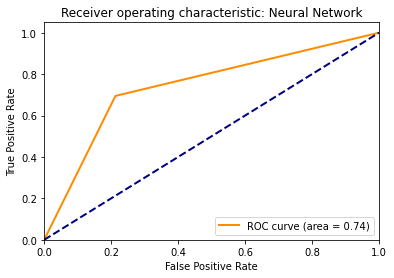

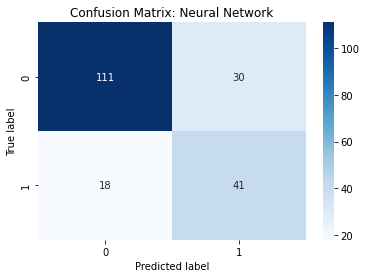

MLPClassifier(random_state=42)

In [46]:
neuronal_network(X_train, X_test, y_train, y_test)

## xGboost

In [64]:
# use xgboost to predict target variable
def xgboost(X_train, X_test, y_train, y_test, hyperopt = False, parameters=dict(),opt = False):
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)

    X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
    X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

    # fit the model
    xgb = XGBClassifier(random_state=42,**parameters, verbosity = 0)

    if hyperopt == False:
        xgb.fit(X_train, y_train)
        # predict the target variable
        y_pred = xgb.predict(X_test)
        # print accuracy score and recall score
        metrics(X,y,y_test, y_pred, crossval=True, modell=xgb)

        if opt==False:
            metrics_dict_non_opt(y_test, y_pred, "xGboost", xgb)
        elif opt == True:
            metrics_dict_opt(y_test, y_pred, "xGboost", xgb)

        plot_roc_curve(y_test, y_pred,"xGboost")
        plot_confusion_matrix(y_test,y_pred,"xGboost")
    else:
        return xgb
    return xgb


----- Metric for 80/20 Split -----
Accuracy score: 0.76
Recall score: 0.5423728813559322
Precision score: 0.6037735849056604
fbeta score: 0.5536332179930795
----- Metric for Cross Validation -----
Crossval score whole Dataset: 0.48229861672112884
Crossval score whole Dataset Detail: [0.47368421 0.50699301 0.51724138 0.40350877 0.42517007 0.54237288
 0.46391753 0.46391753 0.54006969 0.48611111]
Crossval score Train/Test: 0.4886755116909977
Crossval score Train/Test Detail: [0.46808511 0.46052632 0.472103   0.54585153 0.54621849 0.45064378
 0.54585153 0.40178571 0.49568966 0.5       ]


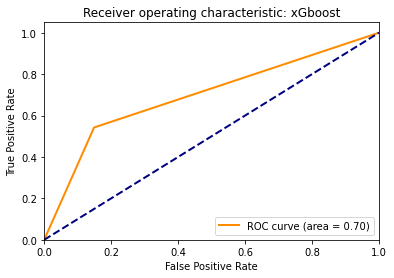

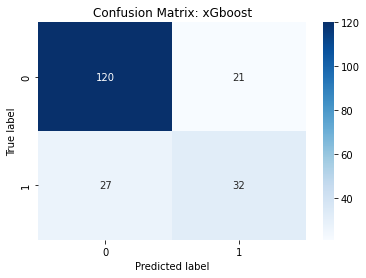

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
xgboost(X_train, X_test, y_train, y_test)

# Results to Dataframe

In [49]:
Non_opt_results = pd.DataFrame(Non_opt_results)
Non_opt_results

,Algo_name,Recall,Precision,Accuracy,F2,F2-CV-Whole,F2-CV-Split
0,Logistic Regression,0.491525,0.557692,0.735,0.503472,0.453009,0.436051
1,Random forest,0.423729,0.714286,0.780,0.461255,0.422345,0.388350
2,Neural Network,0.694915,0.577465,0.760,0.667752,0.489363,0.478111
3,xGboost,0.542373,0.603774,0.760,0.553633,0.482299,0.488676


# Modelling Optimized with Hyperparametertuning

In [50]:
# dictionary for hypertuned modells
Opt_results = {"Algo_name": [], "Recall": [],"Precision": [],"Accuracy": [], "F2": [], "F2-CV-Whole": [], "F2-CV-Split": []}

## Logistic Regression Hyperparamter Tuning

In [51]:
#hyperparameter tuning for logistic regression
#tune hyperparameters
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'],'intercept_scaling': [100, 500, 1000, 5000, 10000], 'class_weight': ["balanced", None]}
# create grid search object with cross validation
grid_search = GridSearchCV(logistic_regression(X_train, X_test, y_train, y_test, hyperopt=True), parameters, cv=cv, scoring=f2, n_jobs=-1)
# fit the model
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# save best hyperparameters in variable
logreg_best_parameters = grid_search.best_params_

Best hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'intercept_scaling': 100, 'penalty': 'l2'}
Best score: 0.6597187445827708


----- Metric for 80/20 Split -----
Accuracy score: 0.71
Recall score: 0.7796610169491526
Precision score: 0.5054945054945055
fbeta score: 0.7033639143730887
----- Metric for Cross Validation -----
Crossval score whole Dataset: 0.6662203906320995
Crossval score whole Dataset Detail: [0.71212121 0.734375   0.66153846 0.62305296 0.6119403  0.66358025
 0.63291139 0.6554878  0.67398119 0.69321534]
Crossval score Train/Test: 0.6597187445827709
Crossval score Train/Test Detail: [0.66420664 0.71428571 0.61023622 0.62992126 0.72243346 0.73308271
 0.67307692 0.6        0.62256809 0.62737643]
(800, 53) (800,)


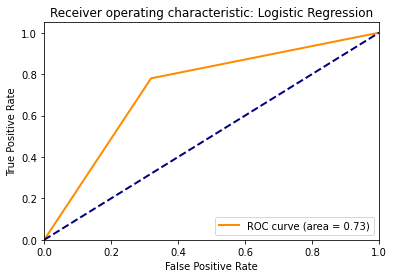

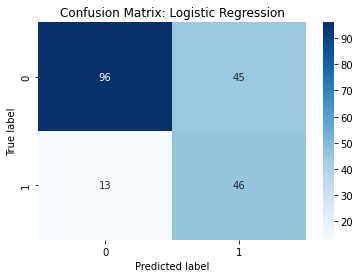

LogisticRegression(C=0.1, class_weight='balanced', intercept_scaling=100,
                   random_state=42)

In [52]:
logistic_regression(X_train, X_test, y_train, y_test, hyperopt=False, parameters=logreg_best_parameters, opt=True)

## Versuch mit Optuna, Ergebnisse sind allerdings Ähnlich wie bei Grid Search

In [53]:

# einmal mit optuna ausprobiert
# import optuna
import optuna 
# tune hyperparameters with optuna package
def tune_logistic_regression(X_train, X_test, y_train, y_test):
    # create optuna object
    study = optuna.create_study(direction="maximize")
    # define objective function
    def objective(trial):
        # define hyperparameters
        C = trial.suggest_uniform("C", 0.001, 1000)
        penalty = trial.suggest_categorical("penalty", [ "l2"])
        intercept_scaling = trial.suggest_int("intercept_scaling", 1, 100000)
        class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
        # create logistic regression object
        logreg = LogisticRegression(C=C, penalty=penalty, intercept_scaling=intercept_scaling, class_weight=class_weight, random_state=42)
        # fit the model
        logreg.fit(X_train, y_train)
        # predict the target variable
        y_pred = logreg.predict(X_test)
        # return recall score
        return recall_score(y_test, y_pred)
    # run optimization with objective function
    study.optimize(objective, n_trials=100)
    # print the best hyperparameters
    print("Best hyperparameters:", study.best_params)
    print("Best score:", study.best_value)
    # save best hyperparameters in variable
    logreg_best_parameters = study.best_params
    # create logistic regression object with best hyperparameters
    logreg = LogisticRegression(C=logreg_best_parameters["C"], penalty=logreg_best_parameters["penalty"], intercept_scaling=logreg_best_parameters["intercept_scaling"], class_weight=logreg_best_parameters["class_weight"], random_state=42)
    # fit the model
    logreg.fit(X_train, y_train)
    # predict the target variable
    y_pred = logreg.predict(X_test)
    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=logreg)

tune_logistic_regression(X_train, X_test, y_train, y_test)

[I 2022-07-28 21:07:46,058] A new study created in memory with name: no-name-f3d632f4-165e-48b5-a8f5-8e81cadbfbef
[I 2022-07-28 21:07:46,079] Trial 0 finished with value: 0.7627118644067796 and parameters: {'C': 849.2094404651565, 'penalty': 'l2', 'intercept_scaling': 13984, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7627118644067796.
[I 2022-07-28 21:07:46,106] Trial 1 finished with value: 0.4915254237288136 and parameters: {'C': 719.763181667912, 'penalty': 'l2', 'intercept_scaling': 36662, 'class_weight': None}. Best is trial 0 with value: 0.7627118644067796.
[I 2022-07-28 21:07:46,125] Trial 2 finished with value: 0.4915254237288136 and parameters: {'C': 925.5876947253287, 'penalty': 'l2', 'intercept_scaling': 83097, 'class_weight': None}. Best is trial 0 with value: 0.7627118644067796.
[I 2022-07-28 21:07:46,144] Trial 3 finished with value: 0.4915254237288136 and parameters: {'C': 912.1900534424619, 'penalty': 'l2', 'intercept_scaling': 46164, 'class_weight': None

Best hyperparameters: {'C': 849.2094404651565, 'penalty': 'l2', 'intercept_scaling': 13984, 'class_weight': 'balanced'}
Best score: 0.7627118644067796
----- Metric for 80/20 Split -----
Accuracy score: 0.72
Recall score: 0.7627118644067796
Precision score: 0.5172413793103449
fbeta score: 0.696594427244582
----- Metric for Cross Validation -----
Crossval score whole Dataset: 0.6387074823938349
Crossval score whole Dataset Detail: [0.68597561 0.72327044 0.65625    0.59748428 0.57228916 0.62305296
 0.63291139 0.61728395 0.63291139 0.64564565]
Crossval score Train/Test: 0.6447325519228571
Crossval score Train/Test Detail: [0.59925094 0.70342205 0.52845528 0.61264822 0.71969697 0.73033708
 0.69498069 0.65637066 0.62745098 0.57471264]


## Random Forest Optimized

In [54]:
#hyperparameter tuning for random forest
#tune hyperparameters
parameters = {'n_estimators': [10, 100, 500], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'max_features': [None, "auto", "sqrt", "log2"], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}
# create grid search object with cross validation
# count time for optimization
start = time.time()
grid_search = GridSearchCV(random_forest(X_train, X_test, y_train, y_test, hyperopt=True), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# time for optimization

# fit the model
grid_search.fit(X_train, y_train)
end = time.time()
print("Time for optimization:", end - start)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
rf_best_parameters = grid_search.best_params_


Time for optimization: 1200.454507112503
Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score: 0.4562132550311195


----- Metric for 80/20 Split -----
Accuracy score: 0.73
Recall score: 0.5254237288135594
Precision score: 0.543859649122807
fbeta score: 0.5290102389078499
----- Metric for Cross Validation -----
Crossval score whole Dataset: 0.4670592233901134
Crossval score whole Dataset Detail: [0.53872054 0.44701987 0.47540984 0.43771044 0.51401869 0.45901639
 0.49152542 0.42763158 0.43103448 0.44850498]
Crossval score Train/Test: 0.4562132550311194
Crossval score Train/Test Detail: [0.45634921 0.50200803 0.41666667 0.41493776 0.41152263 0.50200803
 0.54621849 0.4526749  0.37974684 0.48      ]


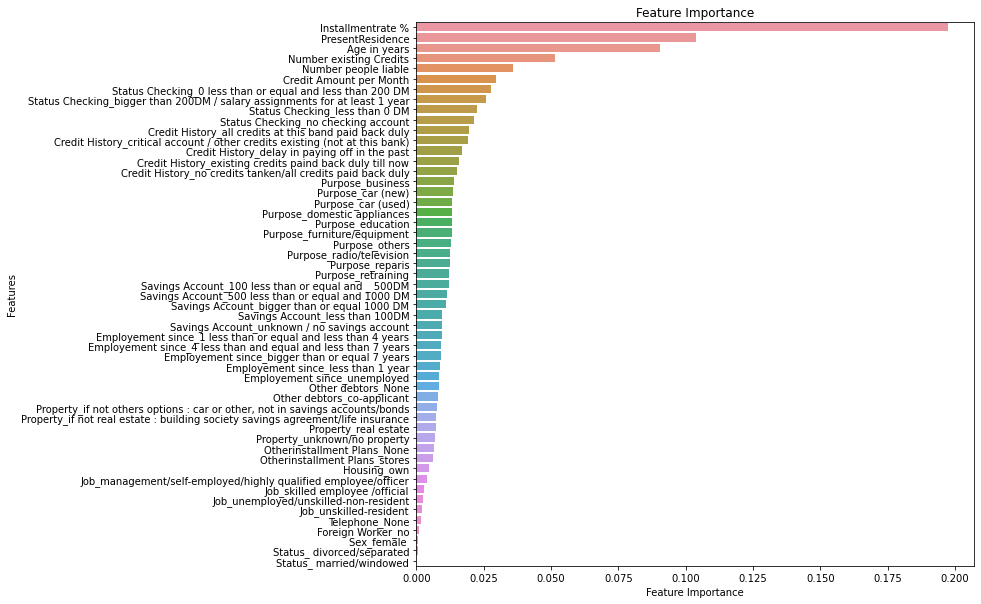

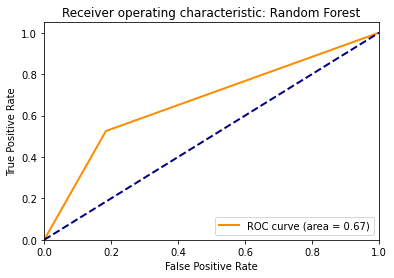

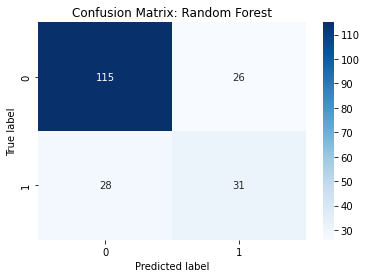

RandomForestClassifier(bootstrap=False, max_features=None, n_estimators=500,
                       random_state=42)

In [55]:
# pass best hyperparameters to random forest function
random_forest(X_train, X_test, y_train, y_test, hyperopt=False, parameters=rf_best_parameters, opt=True)



## xGboost Optimized

In [68]:
# hyperparameter tuning for xgboost

#import randomized search
from sklearn.model_selection import RandomizedSearchCV
#tune hyperparameters
parameters = {'n_estimators': [10, 100, 500], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'max_features': [None, "auto", "sqrt", "log2"], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}
# create grid search object with cross validation
# count time for optimization
start = time.time()
grid_search = RandomizedSearchCV(xgboost(X_train, X_test, y_train, y_test, hyperopt=True), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train, y_train)
end = time.time()
print("Time for optimization:", end - start)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
xgb_best_parameters = grid_search.best_params_



Time for optimization: 5.702998399734497
Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 18, 'bootstrap': True}
Best score: 0.4737831680952926


In [ ]:
#randomserach for xgboost


----- Metric for 80/20 Split -----
Accuracy score: 0.76
Recall score: 0.5423728813559322
Precision score: 0.6037735849056604
fbeta score: 0.5536332179930795
----- Metric for Cross Validation -----
Crossval score whole Dataset: 0.48229861672112884
Crossval score whole Dataset Detail: [0.47368421 0.50699301 0.51724138 0.40350877 0.42517007 0.54237288
 0.46391753 0.46391753 0.54006969 0.48611111]
Crossval score Train/Test: 0.4886755116909977
Crossval score Train/Test Detail: [0.46808511 0.46052632 0.472103   0.54585153 0.54621849 0.45064378
 0.54585153 0.40178571 0.49568966 0.5       ]


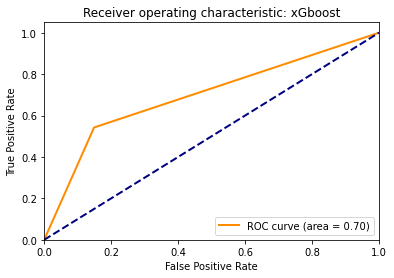

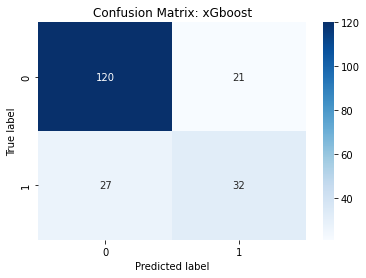

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True, callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_features=None, max_leaves=0,
              min_child_weight=1, min_samples_leaf=1, min_samples_split=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, ...)

In [65]:
# pass best hyperparameters to xgboost function
xgboost(X_train, X_test, y_train, y_test, hyperopt=False, parameters=xgb_best_parameters, opt=True)

In [66]:
Opt_results


{'Algo_name': ['Logistic Regression', 'Random forest', 'xGboost'],
 'Recall': [0.7796610169491526, 0.5254237288135594, 0.5423728813559322],
 'Precision': [0.5054945054945055, 0.543859649122807, 0.6037735849056604],
 'Accuracy': [0.71, 0.73, 0.76],
 'F2': [0.7033639143730887, 0.5290102389078499, 0.5536332179930795],
 'F2-CV-Whole': [0.6662203906320995, 0.4670592233901134, 0.48229861672112884],
 'F2-CV-Split': [0.6597187445827709, 0.4562132550311194, 0.4886755116909977]}

In [67]:
Non_opt_results

,Algo_name,Recall,Precision,Accuracy,F2,F2-CV-Whole,F2-CV-Split
0,Logistic Regression,0.491525,0.557692,0.735,0.503472,0.453009,0.436051
1,Random forest,0.423729,0.714286,0.780,0.461255,0.422345,0.388350
2,Neural Network,0.694915,0.577465,0.760,0.667752,0.489363,0.478111
3,xGboost,0.542373,0.603774,0.760,0.553633,0.482299,0.488676


## Neuronal Network Optimized

In [ ]:
# hyperparameter MLPClassifier with grid search
#tune hyperparameters
parameters = {'activation': ['logistic','relu'],'solver': ['lbfgs', 'sgd', 'adam'], 'max_iter': [100,200,300], 'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5], 'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': [0.0001, 0.001, 0.01, 0.1], 'power_t': [0.1,0.25,0.5, 0.75, 0.9], 'early_stopping':[True,False] ,'shuffle': [True, False]}
 # create grid search object with cross validation
 # count time for optimization
grid_search = GridSearchCV(MLPClassifier(random_state=42), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train, y_train)
end = time.time()
print("Time for optimization:", end - start)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
mlp_best_parameters = grid_search.best_params_
# pass best hyperparameters to MLPClassifier function



KeyboardInterrupt: 

In [ ]:
neuronal_network(X_train, X_test, y_train, y_test, hyperopt=False, parameters=mlp_best_parameters)

NameError: name 'neuronal_network' is not defined

# Optimized Results to Dataframe

In [ ]:
Opt_results = pd.DataFrame(Opt_results)
Opt_results

,Algo_name,Recall,Precision,Accuracy,F2,F2-CV-Whole,F2-CV-Split
0,Logistic Regression,0.775862,0.511364,0.712821,0.703125,0.645030,0.639453
1,Random forest,0.413793,0.369231,0.615385,0.404040,0.436098,0.438531


# Oversampling

In [ ]:
Oversampling_Results = {"Algo_name": [], "F2-CV": []}

In [ ]:
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
# sklearn pipline brauchen für das Hyperparameter Tuning spezielle Namen für die Variablen (z.B. logisticregression__C) --> diese werden später in der Pipline dann manuel bereinigt
parameters_log = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'logisticregression__penalty': ['l1', 'l2'],'logisticregression__intercept_scaling': [1, 10, 100, 1000], 'logisticregression__class_weight': ["balanced", None]}
parameters_rf = {'randomforestclassifier__n_estimators': [10, 100, 500], 'randomforestclassifier__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'randomforestclassifier__max_features': [None, "auto", "sqrt", "log2"], 'randomforestclassifier__min_samples_split': [2, 4, 6, 8, 10], 'randomforestclassifier__min_samples_leaf': [1, 2, 4, 6, 8], 'randomforestclassifier__bootstrap': [True, False]}
parameters_xgb = {'xgbclassifier__n_estimators': [10, 100, 500], 'xgbclassifier__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'xgbclassifier__max_features': [None, "auto", "sqrt", "log2"], 'xgbclassifier__min_samples_split': [2, 4, 6, 8, 10], 'xgbclassifier__min_samples_leaf': [1, 2, 4, 6, 8], 'xgbclassifier__bootstrap': [True, False]}
parameters_nn = {'randomforestclassifier__n_estimators': [10, 100, 500], 'randomforestclassifier__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'randomforestclassifier__max_features': [None, "auto", "sqrt", "log2"], 'randomforestclassifier__min_samples_split': [2, 4, 6, 8, 10], 'randomforestclassifier__min_samples_leaf': [1, 2, 4, 6, 8], 'randomforestclassifier__bootstrap': [True, False]}


In [ ]:
# dict for saving the results of the grid search
# list with possible strings for the model
models = ["logisticregression__", "randomforestclassifier__"]
results = {}

In einem nächsten Schritt wird versucht die Modelle mithilfe von Oversampling zu optimieren. Hierbei ist es wichtig, dass das Oversampling nur auf den Trainingdatensatz angewandt wird und nicht auf die gesamten Daten, da es sonst zu einem starken bias führen kann und die ergebnisse verfälscht.

In [ ]:
# piplne for oversampling grid search
def pipeline(modell, parameter_list):

    prefix = type(modell()).__name__
    print(prefix)
    
    smote = SMOTE(random_state=42,sampling_strategy="auto")

    # logistic regresision classifier
    clf = modell(random_state=42)

    pipeline = make_pipeline(smote, clf)

    Gridsearch = GridSearchCV(pipeline,param_grid = parameter_list,
                                    cv = cv, n_jobs=-1, scoring=f2)
    # fit the model
    Gridsearch.fit(X_train, y_train)

    print("Best parameters:"+ prefix, Gridsearch.best_params_)
    print("Best score:" + prefix, Gridsearch.best_score_)

    best_parameters_new = {}
    # check if prefix contains the string "logisticregression__"
    if prefix == "LogisticRegression":
        for key, value in Gridsearch.best_params_.items():
            key = key.replace("logisticregression__", "")
            best_parameters_new[key] = value

    if prefix == "RandomForestClassifier":
        for key, value in Gridsearch.best_params_.items():
            key = key.replace("randomforestclassifier__", "")
            best_parameters_new[key] = value
    if  prefix == "XGBClassifier":
        for key, value in Gridsearch.best_params_.items():
            key = key.replace("xgbclassifier__", "")
            best_parameters_new[key] = value

    if prefix == "MLPClassifier":
        for key, value in Gridsearch.best_params_.items():
            key = key.replace("mlpclassifier__", "")
            best_parameters_new[key] = value
    
        # save best hyperparameters in variable
    results[prefix] = best_parameters_new

    return results

In [ ]:
pipeline(LogisticRegression, parameters_log)

LogisticRegression
Best parameters:LogisticRegression {'logisticregression__C': 0.001, 'logisticregression__class_weight': 'balanced', 'logisticregression__intercept_scaling': 1, 'logisticregression__penalty': 'l2'}
Best score:LogisticRegression 0.5545027764191022


{'LogisticRegression': {'C': 0.001,
  'class_weight': 'balanced',
  'intercept_scaling': 1,
  'penalty': 'l2'},
 'RandomForestClassifier': {'bootstrap': True,
  'max_depth': 2,
  'max_features': None,
  'min_samples_leaf': 6,
  'min_samples_split': 2,
  'n_estimators': 500}}

In [ ]:
type(MLPClassifier()).__name__

'MLPClassifier'

In [ ]:

pipeline(RandomForestClassifier, parameters_rf)

In [ ]:
pipeline(XGBClassifier, parameters_xgb)

XGBClassifier
[15:51:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best parameters:XGBClassifier {'xgbclassifier__bootstrap': True, 'xgbclassifier__max_depth': 2, 'xgbclassifier__max_features': None, 'xgbclassifier__min_samples_leaf': 1, 'xgbclassifier__min_samples_split': 2, 'xgbclassifier__n_estimators': 10}
Best score:XGBClassifier 0.5510912375926252


{'LogisticRegression': {'C': 0.001,
  'class_weight': 'balanced',
  'intercept_scaling': 1,
  'penalty': 'l2'},
 'RandomForestClassifier': {'bootstrap': True,
  'max_depth': 2,
  'max_features': None,
  'min_samples_leaf': 6,
  'min_samples_split': 2,
  'n_estimators': 500},
 'XGBClassifier': {'bootstrap': True,
  'max_depth': 2,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 10}}

In [ ]:
pipeline(RandomForestClassifier, parameters_rf)

In [ ]:
results

{'LogisticRegression': {'C': 0.001,
  'class_weight': 'balanced',
  'intercept_scaling': 1,
  'penalty': 'l2'},
 'RandomForestClassifier': {'bootstrap': True,
  'max_depth': 2,
  'max_features': None,
  'min_samples_leaf': 6,
  'min_samples_split': 2,
  'n_estimators': 500}}

In [ ]:
def kreuzvalidierung_manuel(modell, parameters):
    f2_scores = []
    for train_index, test_index in cv.split(X,y):
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]  
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]  
        sm = SMOTE( n_jobs=-1)
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
        model =  modell(random_state=42, **parameters)  # Choose a model here
        model.fit(X_train_oversampled, y_train_oversampled)  
        y_pred = model.predict(X_test)
        #print(f'f-score: {fbeta_score(y_test, y_pred, beta = 2)}')
        f2_scores.append(fbeta_score(y_test, y_pred, beta = 2))

    print(f2_scores)
    Oversampling_Results["Algo_name"].append(type(modell()).__name__)
    Oversampling_Results["F2-CV"].append(statistics.mean(f2_scores))
    print(f'Mean f-score: {statistics.mean(f2_scores)}')


In [ ]:
kreuzvalidierung_manuel(LogisticRegression, results["LogisticRegression"])

[0.5956112852664577, 0.5555555555555556, 0.5409836065573771, 0.5592105263157895, 0.5763239875389408, 0.562700964630225, 0.5519480519480519, 0.5501618122977346, 0.5817610062893082, 0.5362776025236594]
Mean f-score: 0.5610534398923099


In [ ]:
Oversampling_Results

{'Algo_name': ['LogisticRegression'], 'F2-CV': [0.5610534398923099]}

In [ ]:
kreuzvalidierung_manuel(RandomForestClassifier, results["RandomForestClassifier"])


In [ ]:
kreuzvalidierung_manuel(XGBClassifier, results["XGBClassifier"])

[16:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


f-score: 0.6040268456375839
[16:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


f-score: 0.5536912751677853
[16:05:49] WARNING: C:/Use

In [ ]:
kreuzvalidierung_manuel(MLPClassifier, results["MLPClassifier"])

# Over/Undersampling SMOTE

In [ ]:
# import smote from imbalanced-learn
from imblearn.over_sampling import SMOTE


In [ ]:
# create smote object
smote = SMOTE(random_state=42,sampling_strategy="auto", k_neighbors=10)
# create smote train
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Shape before SMOTE:", X_train.shape, y_train.shape)
print("Shape after SMOTE:", X_train_smote.shape, y_train_smote.shape)


Shape before SMOTE: (780, 60) (780,)
Shape after SMOTE: (1110, 60) (1110,)


In [ ]:
# grid search for logistic regression
#tune hyperparameters
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ["l2"], 'intercept_scaling': [1, 10, 100, 1000], 'class_weight': ["balanced", None]}
# create grid search object with cross validation
grid_search = GridSearchCV(logistic_regression(X_train_smote, X_test, y_train_smote, y_test, hyperopt=True), parameters, cv=10, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train_smote, y_train_smote)

print(grid_search.cv_results_['mean_test_score'])




# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
logreg_best_parameters_smote = grid_search.best_params_

# logistic regression classifier with best hyperparameters
# create logistic regression classifier with best hyperparameters

print(recall_score(y_test, grid_search.predict(X_test)))

[0.70615565 0.70615565 0.70615565 0.70615565 0.70615565 0.70615565
 0.70615565 0.70615565 0.73534738 0.73534738 0.73534738 0.73534738
 0.73609208 0.73609208 0.73609208 0.73609208 0.75650799 0.75650799
 0.75650799 0.75650799 0.75252951 0.75252951 0.75252951 0.75252951
 0.76088632 0.76088632 0.76088632 0.76088632 0.74921928 0.74921928
 0.74921928 0.74921928 0.75097725 0.75097725 0.75097725 0.75097725
 0.74988576 0.74988576 0.74988576 0.74988576 0.75504907 0.75504907
 0.75504907 0.75504907 0.74056586 0.74056586 0.74056586 0.74056586
 0.73422226 0.73422226 0.73422226 0.73422226 0.7577223  0.7577223
 0.7577223  0.7577223 ]
Best hyperparameters: {'C': 1, 'class_weight': 'balanced', 'intercept_scaling': 1, 'penalty': 'l2'}
Best score: 0.760886315085591
0.5087719298245614


In [ ]:
clf_logreg_smote = LogisticRegression(random_state=42, **logreg_best_parameters_smote)
# fit the model
clf_logreg_smote.fit(X_train_smote, y_train_smote)
# predict on test set
y_pred_logreg_smote = clf_logreg_smote.predict(X_test)
# print the f2 score
cross_val_score(clf_logreg_smote, X_train_smote, y_train_smote, cv=cv, scoring=f2)

array([0.75229358, 0.77272727, 0.84532374, 0.74074074, 0.84086799,
       0.83029197, 0.78610603, 0.78181818, 0.8076225 , 0.72097378])

----- Metric for 80/20 Split -----
Accuracy score: 0.7487179487179487
Recall score: 0.5517241379310345
Precision score: 0.5818181818181818
fbeta score: 0.5574912891986062
----- Metric for Cross Validation -----
Crossval score: 0.6248532256920957
Crossval score: [0.63517915 0.625      0.62706271 0.60606061 0.66343042 0.67307692
 0.64935065 0.61258278 0.58631922 0.5704698 ]
(1110, 60) (1110,)


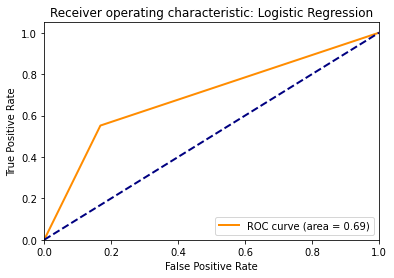

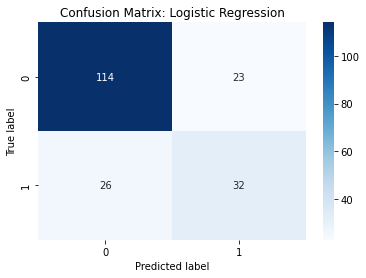

LogisticRegression(C=1, class_weight='balanced', random_state=42)

In [ ]:
logistic_regression(X_train_smote, X_test, y_train_smote, y_test, hyperopt=False, parameters=logreg_best_parameters_smote)

In [ ]:
# grid search for random forest
#tune hyperparameters
parameters = {'n_estimators': [10, 100, 500], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'max_features': [None, "auto", "sqrt", "log2"], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}
# create grid search object with cross validation
grid_search = GridSearchCV(random_forest(X_train_smote, X_test, y_train_smote, y_test, hyperopt=True), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train_smote, y_train_smote)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
rf_best_parameters_smote = grid_search.best_params_


KeyboardInterrupt: 

In [ ]:
random_forest(X_train_smote, X_test, y_train_smote, y_test, hyperopt=False, parameters=rf_best_parameters_smote)

In [ ]:
f2_scores = []
for train_index, test_index in cv.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  
    sm = SMOTE(sampling_strategy="minority",random_state=42, k_neighbors=5 , n_jobs=-1)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model =  random_forest(X_train_oversampled, X_test, y_train_oversampled, y_test,hyperopt=True, **parameters)  # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled)  
    y_pred = model.predict(X_test)
    print(f'f-score: {fbeta_score(y_test, y_pred, beta = 2)}')
    f2_scores.append(fbeta_score(y_test, y_pred, beta = 2))
    
print(f'Mean f-score: {statistics.mean(f2_scores)}')

# xGboost

In [ ]:
# grid search for logistic regression
#tune hyperparameters
parameters = {'n_estimators': [10, 100, 500], 'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'max_features': [None, "auto", "sqrt", "log2"], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6, 8], 'bootstrap': [True, False]}

# create grid search object with cross validation
grid_search = GridSearchCV(xgboost(X_train_smote, X_test, y_train_smote, y_test, hyperopt=True), parameters, cv=cv, scoring=f2 ,n_jobs= -1)
# fit the model
grid_search.fit(X_train_smote, y_train_smote)
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
# save best hyperparameters in variable
xgb_best_parameters_smote = grid_search.best_params_

In [ ]:
f2_scores = []
for train_index, test_index in cv.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]  
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]  
    sm = SMOTE(sampling_strategy="minority",random_state=42, k_neighbors=5 , n_jobs=-1)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model =  xgboost(X_train_oversampled, X_test, y_train_oversampled, y_test,hyperopt=True, **parameters)  # Choose a model here
    model.fit(X_train_oversampled, y_train_oversampled)  
    y_pred = model.predict(X_test)
    print(f'f-score: {fbeta_score(y_test, y_pred, beta = 2)}')
    f2_scores.append(fbeta_score(y_test, y_pred, beta = 2))
    
print(f'Mean f-score: {statistics.mean(f2_scores)}')

# Neuronale Netze SMOTE

# Exkurs Explainable AI

In [ ]:
import wittgenstein as lw
from wittgenstein.ripper import RIPPER
from wittgenstein.interpret import interpret_model, score_fidelity
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict


In [ ]:
# load data to pandas dataframe
ripper_data = pd.read_csv("german_data_ripper.csv")

In [ ]:



# split features and target
X = ripper_data.drop(['Target'], axis=1)
y = ripper_data['Target']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# funktion for fitting Ripper model
def ripper(X_train, X_test, y_train, y_test):
    # create ripper object
    ripper = lw.RIPPER(random_state=42,k=3, dl_allowance=64, n_discretize_bins=10, verbosity=0)
    # fit the model
    ripper.fit(X_train, y_train)
    # predict the target variable
    y_pred = ripper.predict(X_test)
    # print accuracy score and recall score
    metrics(X,y,y_test, y_pred, crossval=True, modell=ripper)

    metrics_dict_non_opt(y_test, y_pred, "Ripper", ripper)

   
    ripper.out_model()

    plot_roc_curve(y_test, y_pred,"Ripper")
    plot_confusion_matrix(y_test,y_pred,"Ripper")
    

In [ ]:
ripper(X_train, X_test, y_train, y_test)